In [1]:
from qctoolkit.pulses import PointPT, SequencePT, ForLoopPT, RepetitionPT, MappingPT
import qctoolkit.pulses.plotting
import numpy as np
import sympy as sp
from sympy import sympify as S

channel_names = ['RFX', 'RFY']

S_init = PointPT([(0,        'S_init'),
                  ('t_init', 'S_init')],
                 channel_names=channel_names, identifier='S_init')

meas_wait = PointPT([(0,             'meas'),
                     ('t_meas_wait', 'meas')],
                   channel_names=channel_names)

adprep = PointPT([(0,           'meas'),
                  ('t_ST_prep', 'ST_plus - ST_jump/2', 'linear'),
                  ('t_ST_prep', 'ST_plus + ST_jump/2'),
                  ('t_op',      'op', 'linear')],
                 parameter_constraints=['Abs(ST_plus - ST_jump/2 - meas) <= Abs(ST_plus - meas)',
                                        'Abs(ST_plus - ST_jump/2 - meas)/t_ST_prep <= max_ramp_speed',
                                        'Abs(ST_plus + ST_jump/2 - op)/Abs(t_ST_prep-t_op) <= max_ramp_speed'],
                 channel_names=channel_names, identifier='adprep')

adread = PointPT([(0,           'op'),
                  ('t_ST_read', 'ST_plus + ST_jump/2', 'linear'),
                  ('t_ST_read', 'ST_plus - ST_jump/2'),
                  ('t_meas_start',      'meas', 'linear'),
                  ('t_meas_start + t_meas_duration', 'meas')],
                 parameter_constraints=['Abs(ST_plus - ST_jump/2 - meas) <= Abs(ST_plus - meas)',
                                        'Abs(ST_plus - ST_jump/2 - meas)/t_ST_read <= max_ramp_speed',
                                        'Abs(ST_plus + ST_jump/2 - op)/Abs(t_ST_read-t_op) <= max_ramp_speed'],
                 channel_names=channel_names, identifier='adread',
                 measurements=[('m', 't_meas_start', 't_meas_duration')])


In [7]:
free_induction = PointPT([(0, 'op-eps_J'),
                          ('t_fid', 'op-eps_J')], channel_names=channel_names)

stepped_free_induction = MappingPT(free_induction, parameter_mapping={'t_fid': 't_start + i_fid*t_step'}, allow_partial_parameter_mapping=True)

pulse = SequencePT(S_init, meas_wait, adprep, stepped_free_induction, adread)

looped_pulse = ForLoopPT(pulse, loop_index='i_fid', loop_range='N_fid_steps')

experiment = RepetitionPT(looped_pulse, 'N_repetitions', identifier='free_induction_decay')

In [8]:
print(experiment.parameter_names)

{'t_step', 'ST_jump', 't_meas_wait', 't_op', 't_meas_duration', 'meas', 'eps_J', 'S_init', 'ST_plus', 'op', 'N_fid_steps', 't_init', 't_ST_prep', 't_ST_read', 't_start', 'N_repetitions', 'max_ramp_speed', 't_meas_start'}


<IPython.core.display.Javascript object>


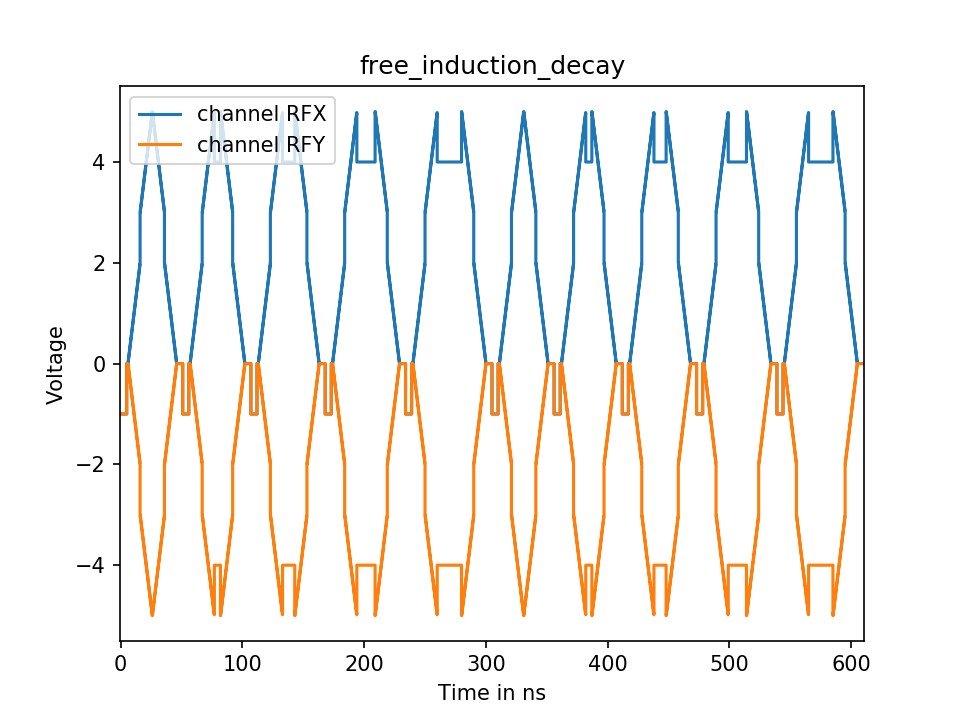

In [12]:
%matplotlib notebook

example_values = dict(meas=[0, 0],
                      op=[5, -5],
                      eps_J=[1, -1],
                      ST_plus=[2.5, -2.5],
                      S_init=[-1, -1],
                      ST_jump=[1, -1],
                      max_ramp_speed=0.3,
                      
                      t_init=5,
                      
                      t_meas_wait = 1,
                      
                      t_ST_prep = 10,
                      t_op = 20,
                      
                      t_ST_read = 10,
                      t_meas_start = 20,
                      t_meas_duration=5,
                     
                      t_start=0,
                      t_step=5,
                      N_fid_steps=5, N_repetitions=2)

# convert lists to numpy arrays
example_values = {k: np.array(v) if isinstance(v, list) else v
                  for k, v in example_values.items()}
from qctoolkit.pulses.plotting import plot

_ = plot(experiment, example_values)

<IPython.core.display.Javascript object>


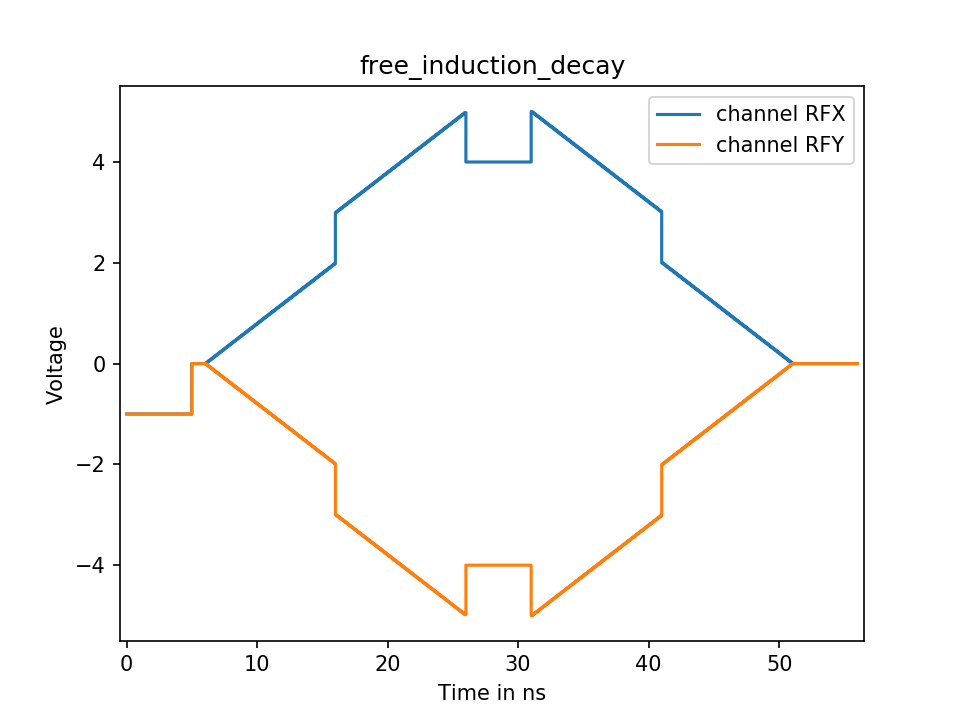

In [13]:
example_values['N_fid_steps'] = 1
example_values['N_repetitions'] = 1
example_values['t_start'] = 5

_ = plot(experiment, example_values)